# Assigment 2

In [94]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

# import plotly.plotly as py
# A function that returns a LaTeX matrix
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\ ' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return ''.join(rv)

# Part1
# Part1.1.a least square:

In [91]:
x1a = np.matrix([[-1, 2, 4, 5, 7],[0, 2, 1, -1, -3]])
print( str(x1a))
print(str(bmatrix(x1a)))

[[-1  2  4  5  7]
 [ 0  2  1 -1 -3]]
\begin{bmatrix}  -1 & 2 & 4 & 5 & 7\\   0 & 2 & 1 & -1 & -3\\ \end{bmatrix}


In [16]:
np.transpose(x1a)*x1a

matrix([[ 1, -2, -4, -5, -7],
        [-2,  8, 10,  8,  8],
        [-4, 10, 17, 19, 25],
        [-5,  8, 19, 26, 38],
        [-7,  8, 25, 38, 58]])

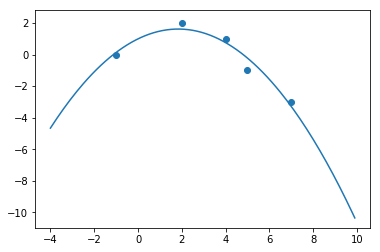

In [76]:
xgrap = np.arange(-4,10, 0.1)
yh = (-.1844)*xgrap**2 + 0.678*xgrap + 1
#ym = (-0.30920162)*xgrap**2 + (0.67836965)*xgrap + (0.99757869)
plt.plot(xgrap,yh)
#plt.plot(xgrap,ym)
plt.scatter(x1a.tolist()[0],x1a.tolist()[1])

Fitting the model in to the moddel

$ p(x)=1a + xb +x^2c=y$

From the matirx abowe the creation of the big X by fitting $p(x)=y$ abowe gives:

In [92]:
xvals=x1a.tolist()[0]
yvals=x1a.tolist()[1]
X = np.matrix([[1, (xvals[0]), (xvals[0])**2],
               [1, (xvals[1]), (xvals[1])**2],
               [1, (xvals[2]), (xvals[2])**2],
               [1, (xvals[3]), (xvals[3])**2],
               [1, (xvals[4]), (xvals[4])**2]
              ])
print(str(bmatrix(X)))
print("xtransposed")
print(str(bmatrix(np.transpose(X))))

\begin{bmatrix}  1 & -1 & 1\\   1 & 2 & 4\\   1 & 4 & 16\\   1 & 5 & 25\\   1 & 7 & 49\\ \end{bmatrix}
xtransposed
\begin{bmatrix}  1 & 1 & 1 & 1 & 1\\   -1 & 2 & 4 & 5 & 7\\   1 & 4 & 16 & 25 & 49\\ \end{bmatrix}


In [90]:
Y = np.matrix([[yvals[0]],
               [yvals[1]],
               [yvals[2]],
               [yvals[3]],
               [yvals[4]]])
print(str(bmatrix(Y)))

\begin{bmatrix}  0\\   2\\   1\\   -1\\   -3\\ \end{bmatrix}


solving $A^TAY$ 

In [93]:
A=np.transpose(X)*X
print(str(bmatrix(A)))

\begin{bmatrix}  5 & 17 & 95\\   17 & 95 & 539\\   95 & 539 & 3299\\ \end{bmatrix}


Calculating the b matrix by $X^T*Y$

In [110]:
b=np.transpose(X)*Y
print(A)
print(b)
print(bmatrix(b))
Ab = np.matrix([[5,17,95,-1],
                [17, 95,539,-18],
                [96,539,3299,-148]])
print(str(Ab))
print("Gausa nu [A|b]")

[[   5   17   95]
 [  17   95  539]
 [  95  539 3299]]
[[  -1]
 [ -18]
 [-148]]
\begin{bmatrix}  -1\\   -18\\   -148\\ \end{bmatrix}
[[   5   17   95   -1]
 [  17   95  539  -18]
 [  96  539 3299 -148]]
Gausa nu [A|b]


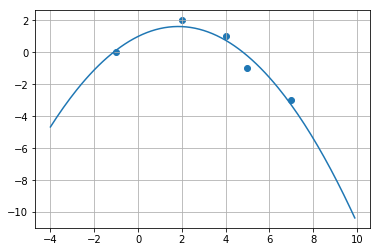

In [109]:
# Did not find a way to do gause in python so did it on calculator
# The Arref down below is done by rref(A|b)
Arref = np.matrix([[1, 0, 0, (412/413)],
                  [0, 1, 0, (1681/2478)],
                  [0, 0, 1, (-457/2478)]])
#Arref.tolist()[0][3]
la=Arref.tolist()
ym = la[0][3] + la[1][3]*xgrap + la[2][3]*(xgrap**2)
plt.scatter(x1a.tolist()[0],x1a.tolist()[1])
#plt.plot(xgrap,yh)
myplot = plt.plot(xgrap,ym)
plt.grid()
plt.savefig("part1_1_a_leastsquare.svg")

In [111]:
sy.Matrix(Ab).rref()

(Matrix([
 [1, 0, 0,   7416/7457],
 [0, 1, 0, 31429/44742],
 [0, 0, 1, -8437/44742]]), (0, 1, 2))